In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns

In [2]:
df = pd.read_csv("compiled_raw_y.csv")
df = df.drop(columns=['Y','Y+1','Y+2','Y+3','Y+4','Y+5','Y+6','Y+7'])
df = df[df['FRSHTT'] != 0]
""" df["FRSHTT"]=str(df["FRSHTT"])
df = df[df['FRSHTT'].str.len() != 5] """

df = df[df['FRSHTT'].apply(lambda x: len(str(x)) == 5)]

df['FOG'] = df.FRSHTT.apply(lambda x: int(str(x)[0]))
df['RAIN'] = df.FRSHTT.apply(lambda x: int(str(x)[1]))
df['SNOW'] = df.FRSHTT.apply(lambda x: int(str(x)[2]))
df['HAIL'] = df.FRSHTT.apply(lambda x: int(str(x)[3]))
df['TT'] = df.FRSHTT.apply(lambda x: int(str(x)[4]))

#una vez separada la columna, no es necesaria tenerla
#todos los valores de fog son iguales por lo que no aporta nada al modelo
df = df.drop(columns=['FRSHTT', 'FOG'])
df.reset_index(drop=True, inplace=True)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,GUST,MAX,MIN,...,STP,TEMP,VISIB,WDSP,WEEKDAY,MONTH,RAIN,SNOW,HAIL,TT
0,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,08.05.11,74.8,999.9,87.8,75.2,...,999.9,81.5,5.9,5.3,1,5,0,0,0,0
1,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,04.04.12,74.3,999.9,84.2,75.2,...,999.9,79.1,5.1,1.9,4,4,0,0,1,0
2,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,07.04.12,69.5,999.9,80.6,71.6,...,999.9,74.9,4.1,3.4,7,4,0,0,1,0
3,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,27.04.12,70.1,999.9,87.8,69.8,...,999.9,78.0,3.7,7.5,6,4,0,0,1,0
4,48303499999,"ROI ET, TH",16.116761,103.773797,137.46,06.05.12,74.2,999.9,91.4,75.2,...,999.9,81.9,6.0,7.6,1,5,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179532 entries, 0 to 179531
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   STATION    179532 non-null  int64  
 1   NAME       179532 non-null  object 
 2   LATITUDE   179532 non-null  float64
 3   LONGITUDE  179532 non-null  float64
 4   ELEVATION  179532 non-null  float64
 5   DATE       179532 non-null  object 
 6   DEWP       179532 non-null  float64
 7   GUST       179532 non-null  float64
 8   MAX        179532 non-null  float64
 9   MIN        179532 non-null  float64
 10  MXSPD      179532 non-null  float64
 11  PRCP       160740 non-null  float64
 12  SLP        179532 non-null  float64
 13  SNDP       179532 non-null  float64
 14  STP        179532 non-null  float64
 15  TEMP       179532 non-null  float64
 16  VISIB      179532 non-null  float64
 17  WDSP       179532 non-null  float64
 18  WEEKDAY    179532 non-null  int64  
 19  MONTH      179532 non-n

In [4]:
df.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DEWP,GUST,MAX,MIN,MXSPD,PRCP,...,STP,TEMP,VISIB,WDSP,WEEKDAY,MONTH,RAIN,SNOW,HAIL,TT
count,1.795320e+05,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,160740.000000,...,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000,179532.000000
mean,4.844085e+10,14.073599,100.879749,104.394748,75.480864,961.173280,91.080167,76.482596,146.320706,0.520002,...,554.373311,81.170778,5.512074,6.022179,4.000234,7.200427,0.000061,0.000964,0.352166,0.000117
std,1.008017e+08,3.840676,1.675686,144.958177,66.307045,190.546042,114.689933,114.780478,344.921890,0.791673,...,486.780420,3.387183,11.063337,61.852420,1.984430,2.493991,0.007827,0.031027,0.477647,0.010815
min,4.830010e+10,6.516667,97.933333,-999.900000,40.400000,9.900000,47.500000,43.700000,1.000000,0.000000,...,0.000000,46.300000,0.300000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.837610e+10,12.500000,99.766667,12.000000,74.200000,999.900000,86.900000,73.900000,4.100000,0.050000,...,7.400000,79.400000,4.700000,0.700000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,4.842710e+10,14.800000,100.566667,51.000000,75.500000,999.900000,90.100000,75.200000,7.000000,0.230000,...,968.300000,81.300000,5.600000,1.800000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,4.850010e+10,17.116667,102.033333,178.910000,76.600000,999.900000,93.000000,77.000000,11.100000,0.670000,...,991.200000,83.200000,6.100000,3.300000,6.000000,9.000000,0.000000,0.000000,1.000000,0.000000
max,4.894610e+10,20.250000,105.033333,460.000000,9999.900000,999.900000,9999.900000,9999.900000,999.900000,18.280000,...,999.900000,98.800000,999.900000,999.900000,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
""" import geopandas
import contextily as ctx
data = [df["STATION"], df["LATITUDE"], df["LONGITUDE"]]
headers = ["STATION","LAT", "LONG"]
df3 = pd.concat(data, axis=1, keys=headers)

df3 = df3.fillna('')\
      .groupby(df3.columns.tolist()).apply(len)\
      .rename('COUNT')\
      .reset_index()\
      .replace('',np.nan)

plt.scatter(df3['LONG'], df3['LAT'], c=df3['COUNT'])
plt.colorbar()
plt.show()

geometry = geopandas.points_from_xy(df3.LONG, df3.LAT)

gdf = geopandas.GeoDataFrame(
    df3, 
    crs='EPSG:4326',
    geometry=geometry)

gdf['values'] = df3['COUNT']
gdf = gdf.to_crs(epsg=3857)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=3857)

# Restringir a tailandia
ax = world[world.name == 'Thailand'].plot(
    figsize=(15, 15),
    color='white',
    alpha=0.5,
    edgecolor='k')

ctx.add_basemap(ax)

# Plot geodataframe
gdf.plot(ax=ax, column='values', cmap='plasma', legend=True, markersize=(gdf['values']/20))
plt.savefig('thailand_stations.jpg')
plt.show() """

' import geopandas\nimport contextily as ctx\ndata = [df["STATION"], df["LATITUDE"], df["LONGITUDE"]]\nheaders = ["STATION","LAT", "LONG"]\ndf3 = pd.concat(data, axis=1, keys=headers)\n\ndf3 = df3.fillna(\'\')      .groupby(df3.columns.tolist()).apply(len)      .rename(\'COUNT\')      .reset_index()      .replace(\'\',np.nan)\n\nplt.scatter(df3[\'LONG\'], df3[\'LAT\'], c=df3[\'COUNT\'])\nplt.colorbar()\nplt.show()\n\ngeometry = geopandas.points_from_xy(df3.LONG, df3.LAT)\n\ngdf = geopandas.GeoDataFrame(\n    df3, \n    crs=\'EPSG:4326\',\n    geometry=geometry)\n\ngdf[\'values\'] = df3[\'COUNT\']\ngdf = gdf.to_crs(epsg=3857)\n\nworld = geopandas.read_file(geopandas.datasets.get_path(\'naturalearth_lowres\'))\nworld = world.to_crs(epsg=3857)\n\n# Restringir a tailandia\nax = world[world.name == \'Thailand\'].plot(\n    figsize=(15, 15),\n    color=\'white\',\n    alpha=0.5,\n    edgecolor=\'k\')\n\nctx.add_basemap(ax)\n\n# Plot geodataframe\ngdf.plot(ax=ax, column=\'values\', cmap=\'pla

In [6]:
df.HAIL.value_counts()

0    116307
1     63225
Name: HAIL, dtype: int64

In [7]:
df= df.drop(columns=['STATION', 'DATE', 'LATITUDE', 'NAME', 'WEEKDAY', 'PRCP', 'GUST'])
# df["PRCP"].fillna("0", inplace = True)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('HAIL',axis=1), 
                                                    df['HAIL'], test_size=0.3, 
                                                    random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train) 

LogisticRegression(solver='liblinear')

In [10]:
predictions = logmodel.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79     35020
           1       0.63      0.18      0.28     18840

    accuracy                           0.68     53860
   macro avg       0.66      0.56      0.54     53860
weighted avg       0.66      0.68      0.61     53860



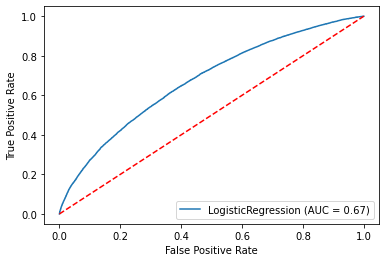

In [12]:
from sklearn import metrics
metrics.plot_roc_curve(logmodel,X_test,y_test)
ax = plt.plot([0, 1], [0, 1], color='red', linestyle='--')